In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/train.csv')

In [8]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

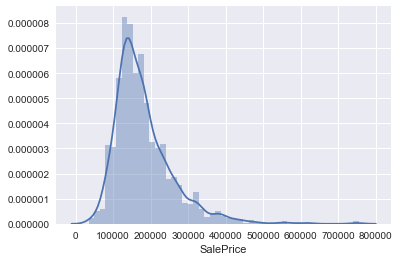

In [12]:
sns.distplot(df_train['SalePrice'])

In [13]:
df_train['SalePrice'].skew()

1.8828757597682129

In [14]:
df_train['SalePrice'].kurt()

6.5362818600645287

In [15]:
var = 'GrLivArea'


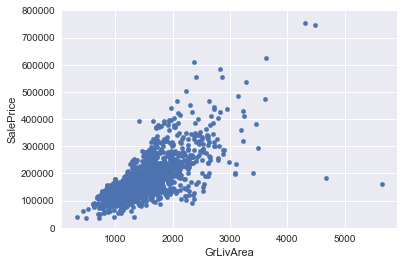

In [17]:
df_train.plot.scatter(x=var, y='SalePrice',  ylim=(0,800000))

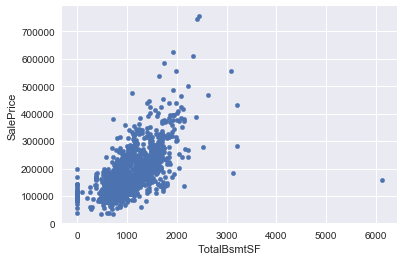

In [20]:
df_train.plot.scatter(x='TotalBsmtSF', y='SalePrice')

# Relationship with categorical features¶


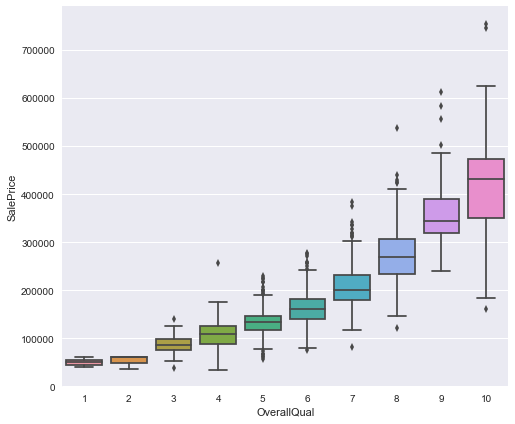

In [26]:
var = 'OverallQual'
f, ax = plt.subplots(figsize=(8, 7))
sns.boxplot(x=var, y='SalePrice', data=df_train)

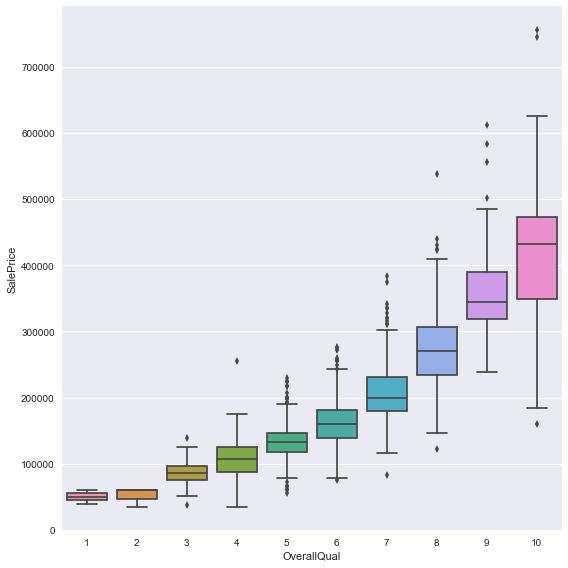

In [29]:
sns.factorplot(x=var, y='SalePrice', data=df_train, kind='box', size=8)

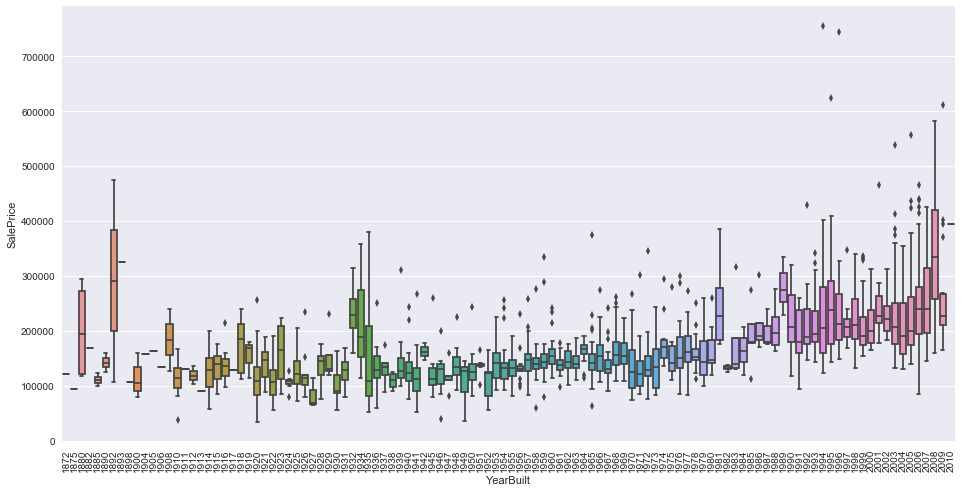

In [48]:
f, ax = plt.subplots(figsize=(16, 8))

fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=df_train, ax=ax)

plt.xticks(rotation=90);

## Correlation matrix (heatmap style)¶

In [49]:
correct = df_train.corr()

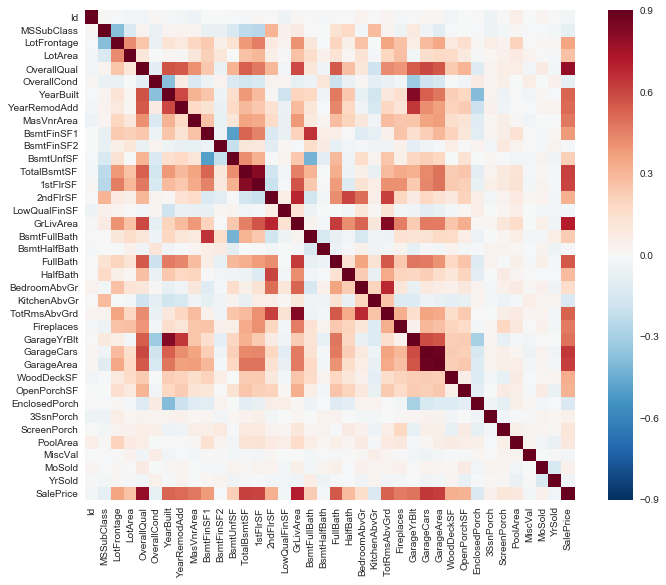

In [52]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correct, vmax=0.9, square=True)


In [76]:
k = 10
cols = correct.nlargest(k, 'SalePrice')['SalePrice'].index

In [77]:
cols

Index([u'SalePrice', u'OverallQual', u'GrLivArea', u'GarageCars',
       u'GarageArea', u'TotalBsmtSF', u'1stFlrSF', u'FullBath',
       u'TotRmsAbvGrd', u'YearBuilt'],
      dtype='object')

In [78]:
cm = np.corrcoef(df_train[cols].values.T)

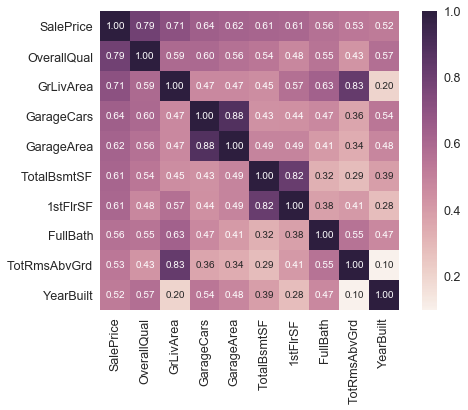

In [83]:
sns.set(font_scale=1.25)

hm = sns.heatmap(cm, cbar=True, 
                 annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)


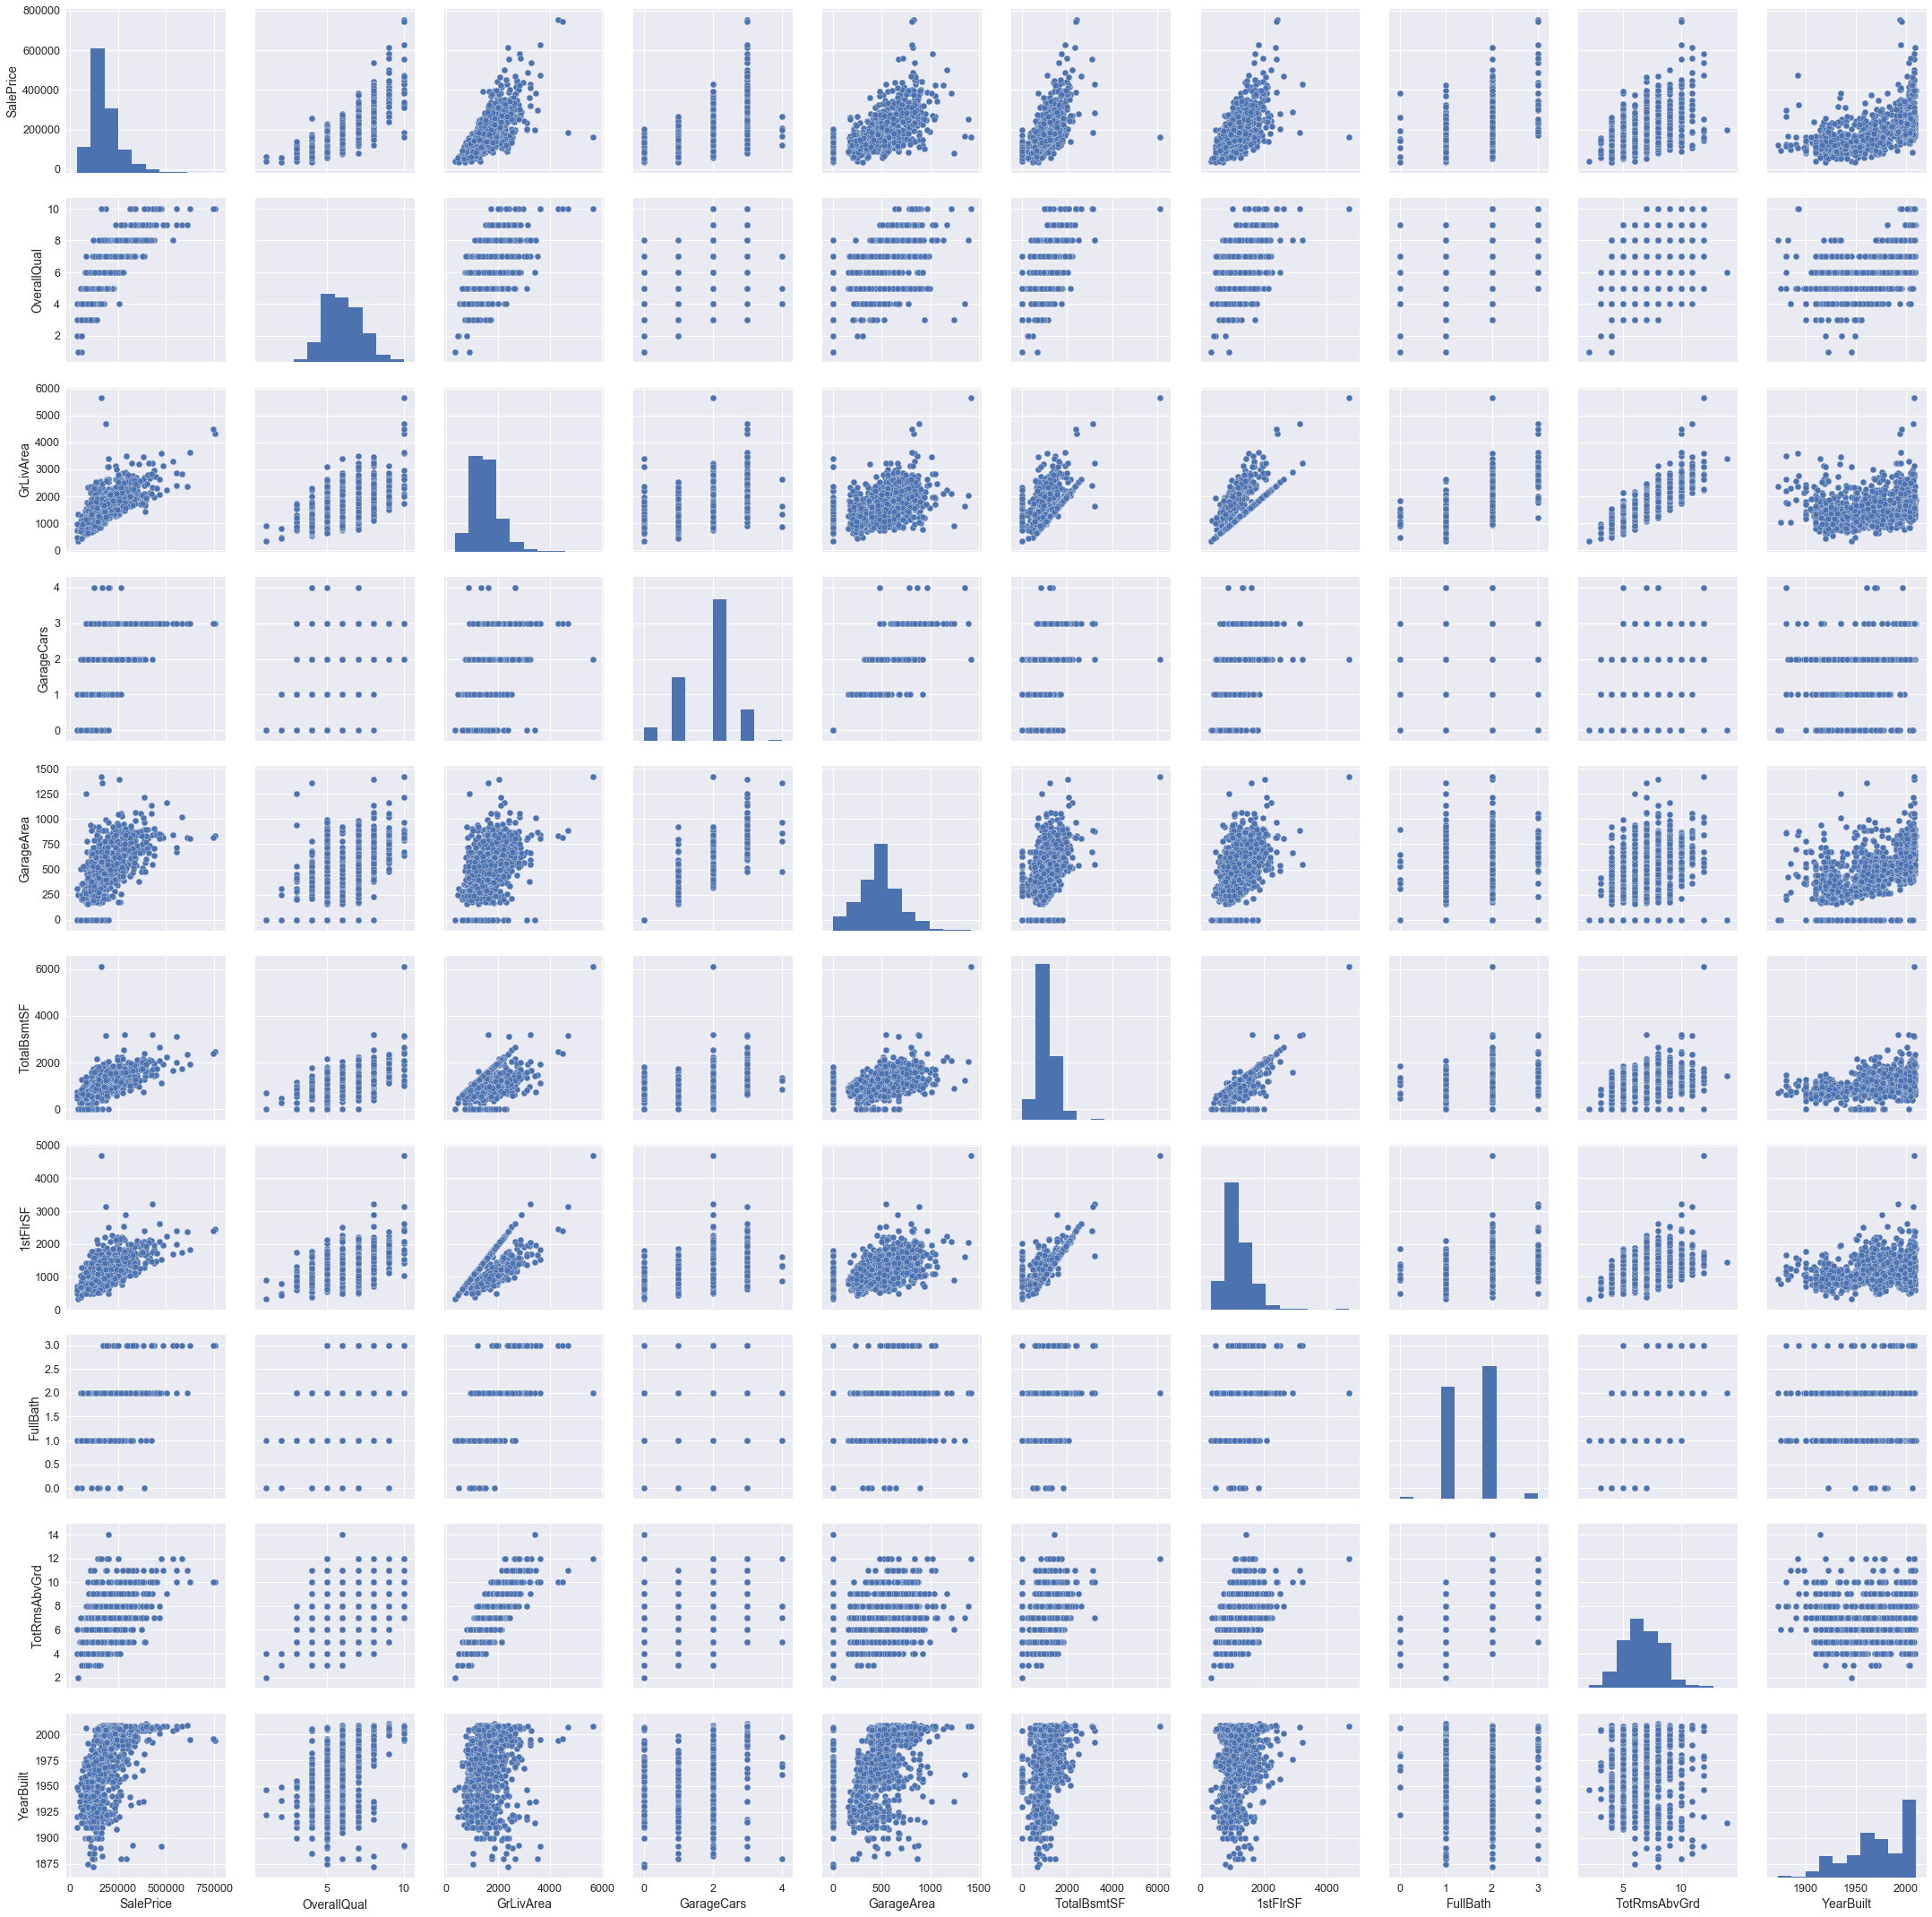

In [85]:
sns.pairplot(data=df_train[cols], size=3)

# missing data

In [91]:
total = df_train.isnull().sum().sort_values(ascending=False)

In [93]:
missing_total = np.sum(total)

In [99]:
precent = total / float(len(df_train))

In [105]:
missing_data = pd.concat([total, precent],axis=1, keys=['count', 'precent'])

In [106]:
missing_data

,count,precent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [110]:
df_train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [111]:
# out liars

In [120]:
np.newaxis?

In [123]:
#standardizing data
saleprice_stand = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])

In [124]:
saleprice_stand

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ..., 
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

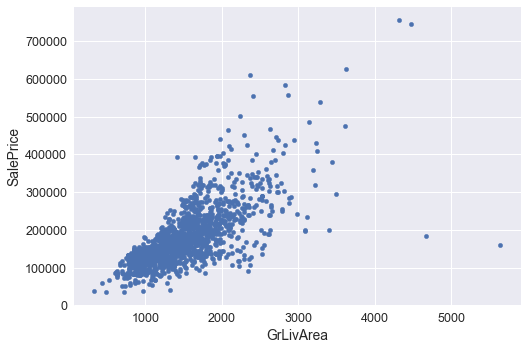

In [130]:
df_train.plot.scatter(x='GrLivArea', y="SalePrice")

In [142]:
df_train.drop(df_train[(df_train.SalePrice > 700000) | (df_train.GrLivArea > 4000)].index, axis=0, inplace=True)

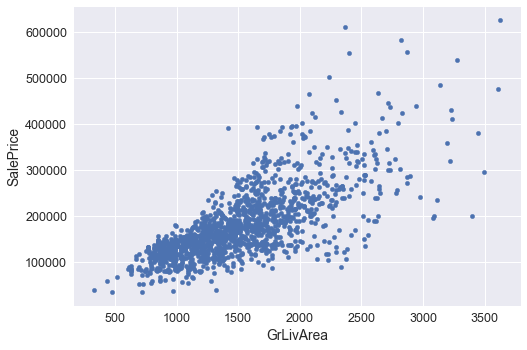

In [143]:
df_train.plot.scatter(x='GrLivArea', y='SalePrice')

In [144]:
# TotalBsmtSF

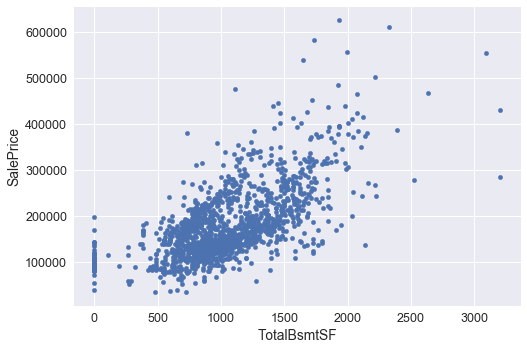

In [145]:
df_train.plot.scatter(x='TotalBsmtSF', y='SalePrice')

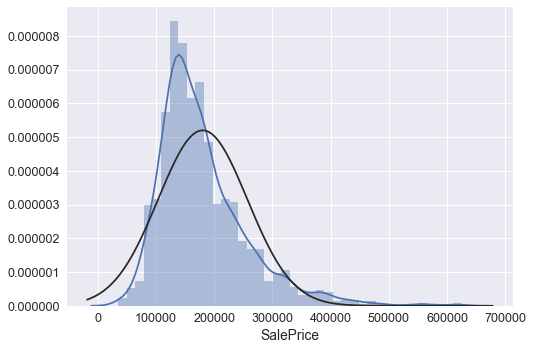

In [148]:
#histogram and normal probability plot

sns.distplot(df_train['SalePrice'], fit=norm)

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([ 34900,  35311,  37900, ..., 582933, 611657, 625000])),
 (72570.59220153997, 180130.80880330128, 0.9440312815158669))

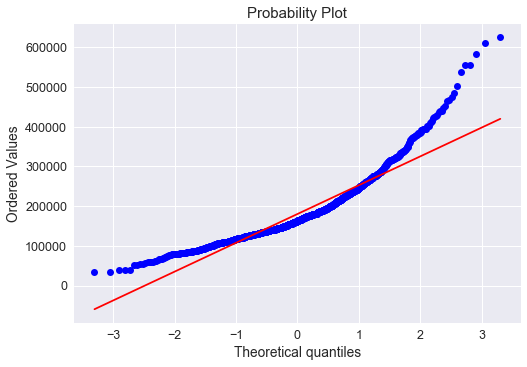

In [150]:
stats.probplot(df_train['SalePrice'], plot=plt)

In [151]:
# apply log
saleprice = np.log(df_train['SalePrice'])

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([ 10.46024211,  10.47194981,  10.54270639, ...,  13.27582754,
          13.32392695,  13.34550693])),
 (0.39535575476025442, 12.021727861009746, 0.99596120465197735))

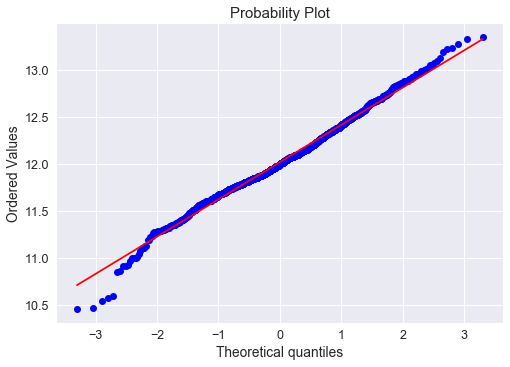

In [152]:
stats.probplot(saleprice, plot=plt)

# GrLivArea

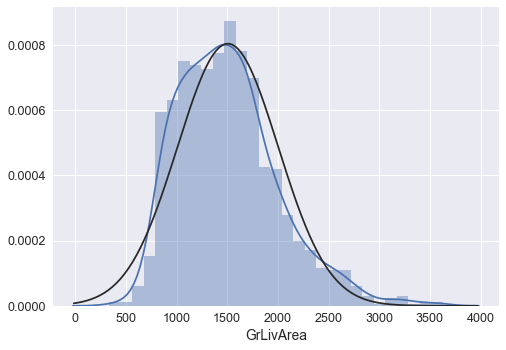

In [155]:
sns.distplot(df_train['GrLivArea'], fit=norm)

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([ 334,  438,  480, ..., 3493, 3608, 3627])),
 (487.89564035477196, 1506.5302613480058, 0.97988348420534988))

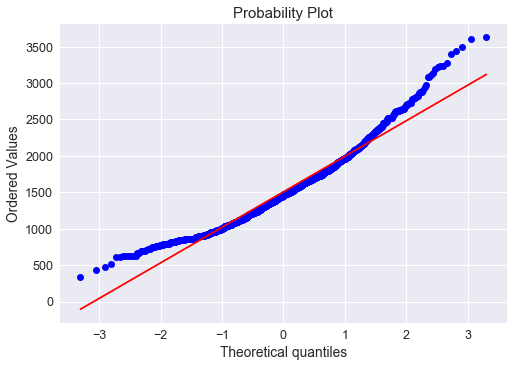

In [158]:
stats.probplot(df_train['GrLivArea'], plot=plt)

In [159]:
# data transform

In [160]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([ 5.81114099,  6.08221891,  6.1737861 , ...,  8.15851624,
          8.19090888,  8.19616114])),
 (0.32803194834263222, 7.2644436976145137, 0.99795598282116227))

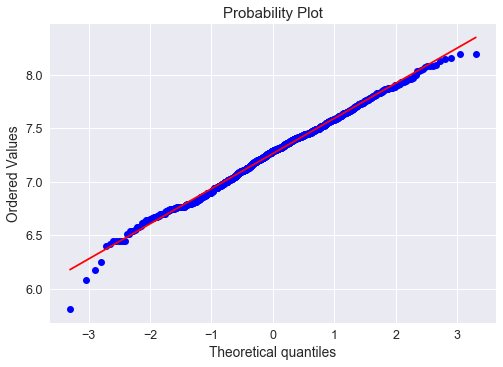

In [161]:
stats.probplot(df_train['GrLivArea'], plot=plt)

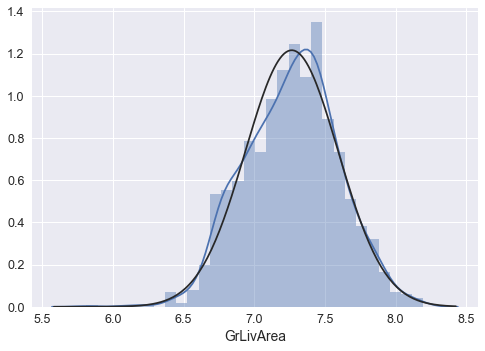

In [165]:
sns.distplot(df_train['GrLivArea'], fit=norm)

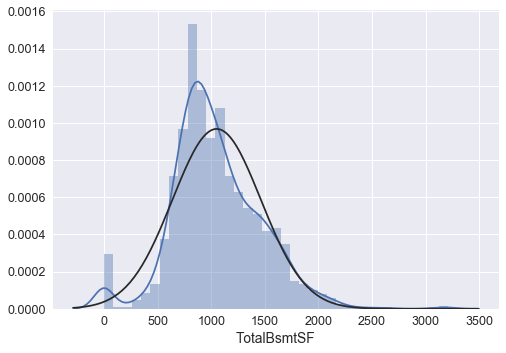

In [164]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm)

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([   0,    0,    0, ..., 3094, 3200, 3206])),
 (405.91746949621495, 1050.6471801925723, 0.98272113216454793))

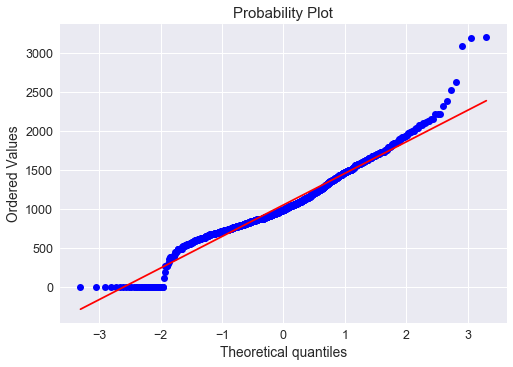

In [166]:
stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [167]:
totalbasement = np.log(df_train['TotalBsmtSF'] + 1)

((array([-3.296754  , -3.03893968, -2.89552963, ...,  2.89552963,
          3.03893968,  3.296754  ]),
  array([ 4.66343909,  5.25227343,  5.57972983, ...,  8.03754319,
          8.07121854,  8.0730912 ])),
 (0.35312325474281109, 6.9227730787266664, 0.99104852910667574))

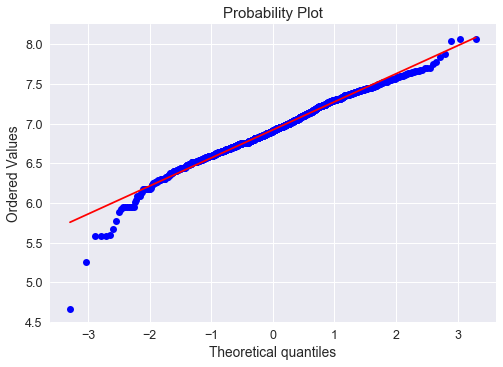

In [171]:
stats.probplot(totalbasement[totalbasement > 0], plot=plt)

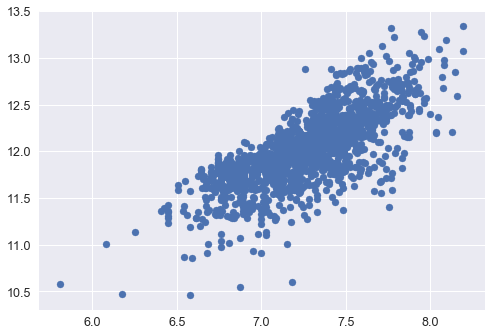

In [172]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'],);
